# **Research Project (Honours)**

###### *By Mahlatsi Malise Mashilo (202215639)*

### **Forecasting Car Sales in South Africa Using Google Search Data with Post-hoc Explainable AI**
##### *Results Analysis Notebook*

## 1. Libraries

In [2]:
import os
import pandas as pd, numpy as np, seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt, seaborn as sns, plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

## 2. Importing Final Datasts

In [3]:
def load_forecast_results(base_dir="forecast_results", summary_folder="results_summary"):
    """
    Load all Excel result files and their sheets from the given directory.
    
    Returns:
    --------
    results_dict : dict
        {
            "sales_comparison_tables": {
                "Summary": <DataFrame>,
                "RMSE": <DataFrame>,
                ...
            },
            "sales_model_results": <DataFrame>,
            "volume_comparison_tables": {
                "Summary": <DataFrame>,
                ...
            },
            "volume_model_results": <DataFrame>
        }
    """
    summary_path = os.path.join(base_dir, summary_folder)
    results_dict = {}

    # Sanity check
    if not os.path.exists(summary_path):
        raise FileNotFoundError(f"Path not found: {summary_path}")

    # Loop through all Excel files
    for file_name in os.listdir(summary_path):
        if file_name.endswith(".xlsx"):
            file_path = os.path.join(summary_path, file_name)
            file_key = file_name.replace(".xlsx", "")

            # Detect if it’s a comparison table (multiple sheets) or single sheet
            try:
                xls = pd.ExcelFile(file_path)
                sheet_names = xls.sheet_names

                if len(sheet_names) > 1:
                    # Multiple sheets → store in nested dict
                    results_dict[file_key] = {
                        sheet: pd.read_excel(xls, sheet_name=sheet, skiprows=2)
                        for sheet in sheet_names
                    }
                else:
                    # Single sheet file
                    results_dict[file_key] = pd.read_excel(file_path)

                print(f"✅ Loaded '{file_name}' with {len(sheet_names)} sheet(s).")

            except Exception as e:
                print(f"⚠️ Failed to load {file_name}: {e}")

    print("\n📂 Loaded files:")
    for k, v in results_dict.items():
        if isinstance(v, dict):
            print(f"  - {k}: {len(v)} sheets ({', '.join(v.keys())})")
        else:
            print(f"  - {k}: 1 sheet (single DataFrame)")

    return results_dict


# ==== Example usage ====
results = load_forecast_results()

# Access examples:
sales_summary = results["sales_comparison_tables"]["Summary"]
volume_summary = results["volume_comparison_tables"]["Summary"]
sales_raw = results["sales_model_results"]
volume_raw = results["volume_model_results"]

print("\n🧾Result Shapes:")
print("Sales Summary:", sales_summary.shape)
print("Volume Summary:", volume_summary.shape)
print("Volume Raw Results:", volume_raw.shape)
print("Sales Raw Results:", sales_raw.shape)


✅ Loaded 'sales_comparison_tables.xlsx' with 7 sheet(s).
✅ Loaded 'sales_model_results.xlsx' with 1 sheet(s).
✅ Loaded 'volume_comparison_tables.xlsx' with 7 sheet(s).
✅ Loaded 'volume_model_results.xlsx' with 1 sheet(s).

📂 Loaded files:
  - sales_comparison_tables: 7 sheets (Summary, RMSE, MAE, MAPE, R2, AIC, BIC)
  - sales_model_results: 1 sheet (single DataFrame)
  - volume_comparison_tables: 7 sheets (Summary, RMSE, MAE, MAPE, R2, AIC, BIC)
  - volume_model_results: 1 sheet (single DataFrame)

🧾Result Shapes:
Sales Summary: (6, 3)
Volume Summary: (6, 3)
Volume Raw Results: (24, 7)
Sales Raw Results: (24, 7)


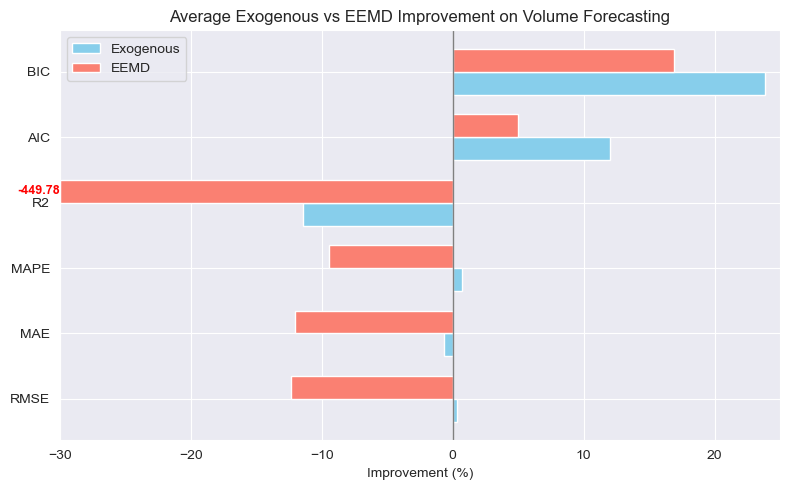

In [36]:
# Plot settings
x_limits = (-30, 25)
bar_height = 0.35

fig, ax = plt.subplots(figsize=(8, 5))

# Positions for bars
y_positions = range(len(volume_summary))

# Draw Exog bars
ax.barh(
    [y - bar_height/2 for y in y_positions],
    volume_summary["Avg Exog Improvement (%)"].clip(*x_limits),
    height=bar_height,
    color="skyblue",
    label="Exogenous"
)

# Draw EEMD bars
ax.barh(
    [y + bar_height/2 for y in y_positions],
    volume_summary["Avg EEMD Improvement (%)"].clip(*x_limits),
    height=bar_height,
    color="salmon",
    label="EEMD"
)

# Label clipped bars with true values
for i, (exog, eemd) in enumerate(zip(volume_summary["Avg Exog Improvement (%)"], volume_summary["Avg EEMD Improvement (%)"])):
    if exog < x_limits[0] or exog > x_limits[1]:
        ax.text(
            x_limits[1] if exog > 0 else x_limits[0],
            i - bar_height/2,
            f"{exog:.2f}",
            va="center",
            ha="left" if exog > 0 else "right",
            color="blue",
            fontsize=9,
            fontweight="bold"
        )
    if eemd < x_limits[0] or eemd > x_limits[1]:
        ax.text(
            x_limits[1] if eemd > 0 else x_limits[0],
            i + bar_height/2,
            f"{eemd:.2f}",
            va="center",
            ha="left" if eemd > 0 else "right",
            color="red",
            fontsize=9,
            fontweight="bold"
        )

# Customize
ax.set_yticks(y_positions)
ax.set_yticklabels(volume_summary["Metric"])
ax.set_xlabel("Improvement (%)")
ax.set_title("Average Exogenous vs EEMD Improvement on Volume Forecasting")
ax.set_xlim(x_limits)
ax.axvline(0, color="gray", linewidth=1)
ax.legend()

plt.tight_layout()
plt.show()

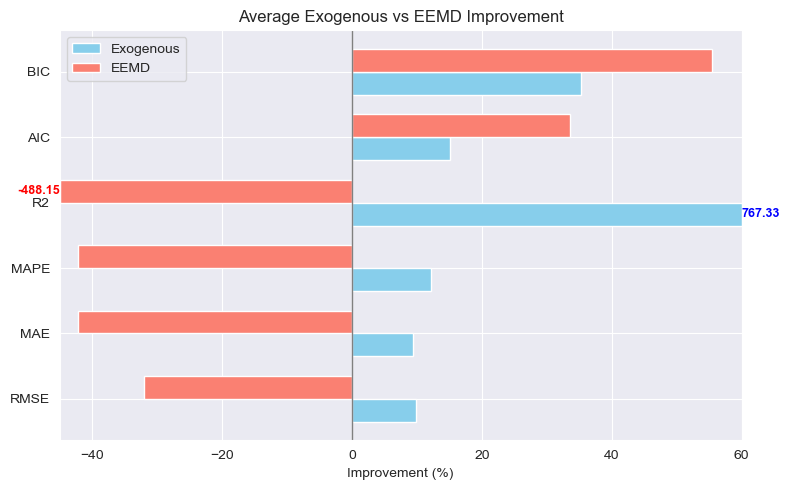

In [37]:
# Plot settings
x_limits = (-45, 60)
bar_height = 0.35

fig, ax = plt.subplots(figsize=(8, 5))

# Positions for bars
y_positions = range(len(sales_summary))

# Draw Exog bars
ax.barh(
    [y - bar_height/2 for y in y_positions],
    sales_summary["Avg Exog Improvement (%)"].clip(*x_limits),
    height=bar_height,
    color="skyblue",
    label="Exogenous"
)

# Draw EEMD bars
ax.barh(
    [y + bar_height/2 for y in y_positions],
    sales_summary["Avg EEMD Improvement (%)"].clip(*x_limits),
    height=bar_height,
    color="salmon",
    label="EEMD"
)

# Label clipped bars with true values
for i, (exog, eemd) in enumerate(zip(sales_summary["Avg Exog Improvement (%)"], sales_summary["Avg EEMD Improvement (%)"])):
    if exog < x_limits[0] or exog > x_limits[1]:
        ax.text(
            x_limits[1] if exog > 0 else x_limits[0],
            i - bar_height/2,
            f"{exog:.2f}",
            va="center",
            ha="left" if exog > 0 else "right",
            color="blue",
            fontsize=9,
            fontweight="bold"
        )
    if eemd < x_limits[0] or eemd > x_limits[1]:
        ax.text(
            x_limits[1] if eemd > 0 else x_limits[0],
            i + bar_height/2,
            f"{eemd:.2f}",
            va="center",
            ha="left" if eemd > 0 else "right",
            color="red",
            fontsize=9,
            fontweight="bold"
        )

# Customize
ax.set_yticks(y_positions)
ax.set_yticklabels(sales_summary["Metric"])
ax.set_xlabel("Improvement (%)")
ax.set_title("Average Exogenous vs EEMD Improvement")
ax.set_xlim(x_limits)
ax.axvline(0, color="gray", linewidth=1)
ax.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Split metrics
metrics_main = ["RMSE", "MAE", "MAPE", "R2"]
metrics_ic = ["AIC", "BIC"]

def plot_metrics(df, metrics, title):
    fig = go.Figure()
    
    for metric in metrics:
        fig.add_trace(go.Bar(
            x=df["Model"],
            y=df[metric],
            name=metric,
            text=[f"{v:.2f}" for v in df[metric]],
            textposition="outside",
            hovertemplate=f"<b>%{{x}}</b><br>{metric}: %{{y}}<extra></extra>"
        ))
    
    fig.update_layout(
        title=title,
        xaxis_title="Model",
        yaxis_title="Metric Value",
        barmode="group",
        template="plotly_white",
        height=600,
    )
    fig.show()

# Plot main metrics
plot_metrics(sales_raw, metrics_main, "Model Performance Metrics (RMSE, MAE, MAPE, R2)")

# Plot AIC/BIC
plot_metrics(sales_raw, metrics_ic, "Model Performance Metrics (AIC, BIC)")
